Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

4.) What was the correlation between different stocks' daily returns?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?

Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [12]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
# from pandas.io.data import DataReader
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [4]:
end = datetime.now()

start = datetime(end.year - 1, end.month, end.day)

In [16]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, 'yahoo', start, end)

In [17]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,141.341315,142.295060,140.435937,141.474103,140.677993,2.793747e+07
std,16.902716,16.923112,16.647013,16.736888,17.202225,1.190328e+07
min,106.570000,107.680000,104.080002,105.709999,104.410980,1.147590e+07
25%,130.944999,132.154998,130.784996,131.784996,130.165566,2.067555e+07
50%,144.449997,145.300003,143.449997,144.289993,143.610962,2.533170e+07
75%,154.799995,155.470001,153.805001,154.735001,154.431870,3.221495e+07
max,174.000000,174.259995,171.119995,172.500000,172.500000,1.119850e+08


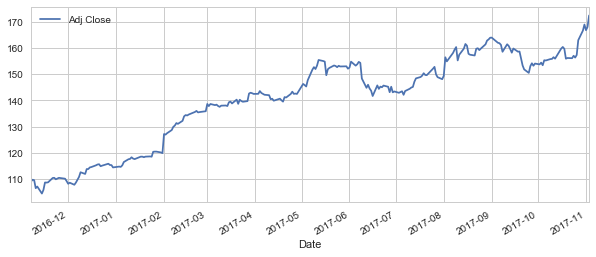

In [18]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

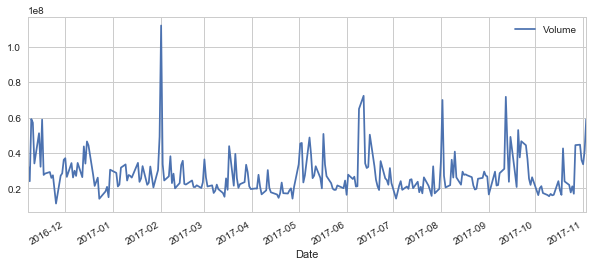

In [19]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [31]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
#     AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

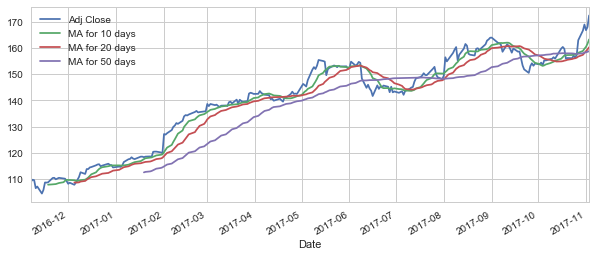

In [29]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(10,4))

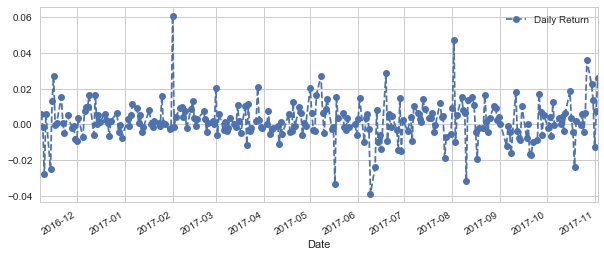

In [35]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

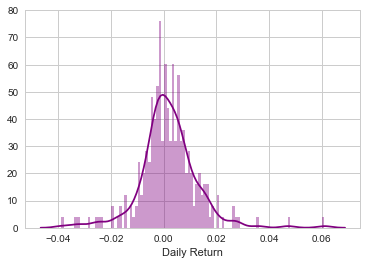

In [36]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

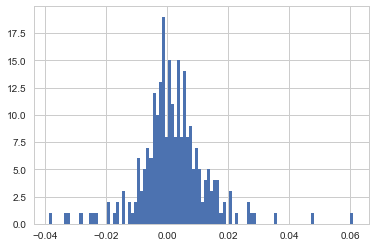

In [39]:
AAPL['Daily Return'].hist(bins=100)

In [40]:
closing_df = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [42]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-03,172.500000,1111.599976,1032.479980,84.139999
2017-11-02,168.110001,1094.219971,1025.579956,84.050003
2017-11-01,166.889999,1103.680054,1025.500000,83.180000
2017-10-31,169.039993,1105.280029,1016.640015,83.180000
2017-10-30,166.720001,1110.849976,1017.109985,83.889999


In [43]:
tech_rets = closing_df.pct_change()

In [44]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-03,NaN,NaN,NaN,NaN
2017-11-02,-0.025449,-0.015635,-0.006683,-0.001070
2017-11-01,-0.007257,0.008646,-0.000078,-0.010351
2017-10-31,0.012883,0.001450,-0.008640,0.000000
2017-10-30,-0.013725,0.005039,0.000462,0.008536


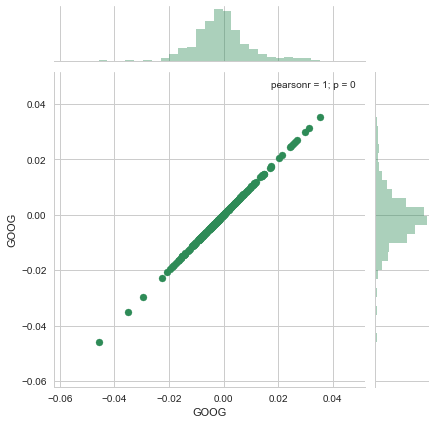

In [45]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

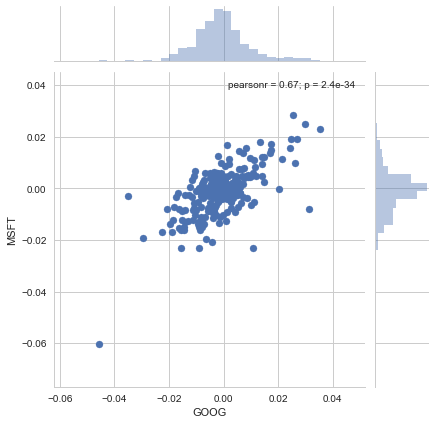

In [46]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

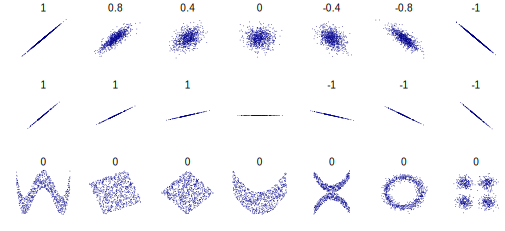

In [47]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [48]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-03,NaN,NaN,NaN,NaN
2017-11-02,-0.025449,-0.015635,-0.006683,-0.001070
2017-11-01,-0.007257,0.008646,-0.000078,-0.010351
2017-10-31,0.012883,0.001450,-0.008640,0.000000
2017-10-30,-0.013725,0.005039,0.000462,0.008536


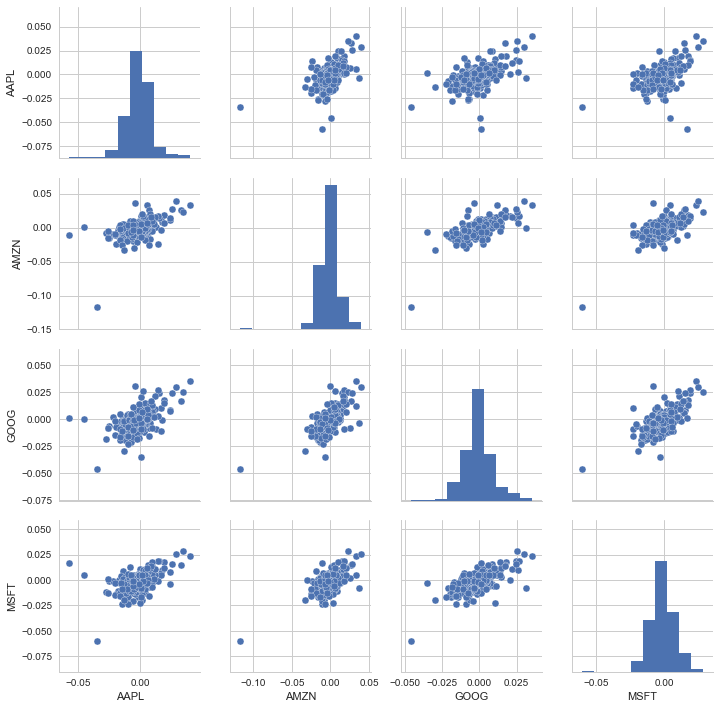

In [49]:
sns.pairplot(tech_rets.dropna())

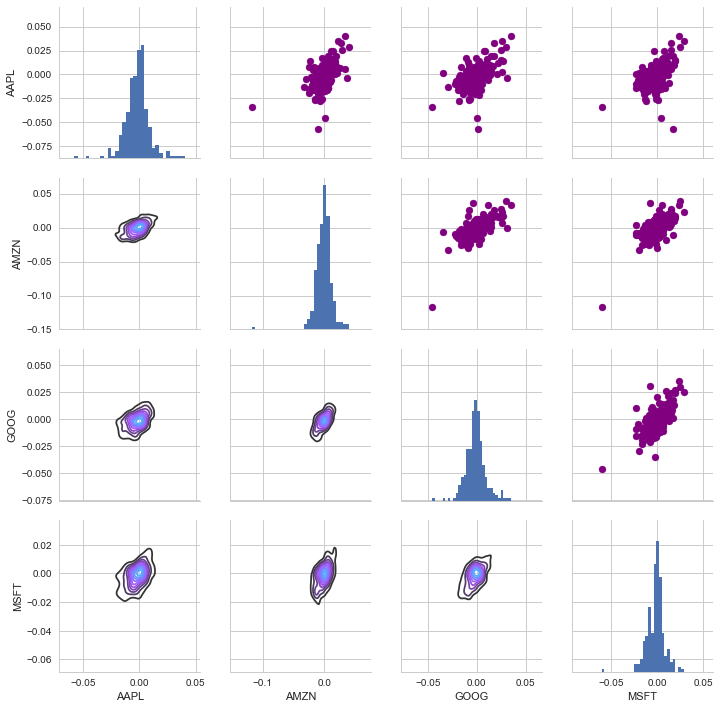

In [50]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

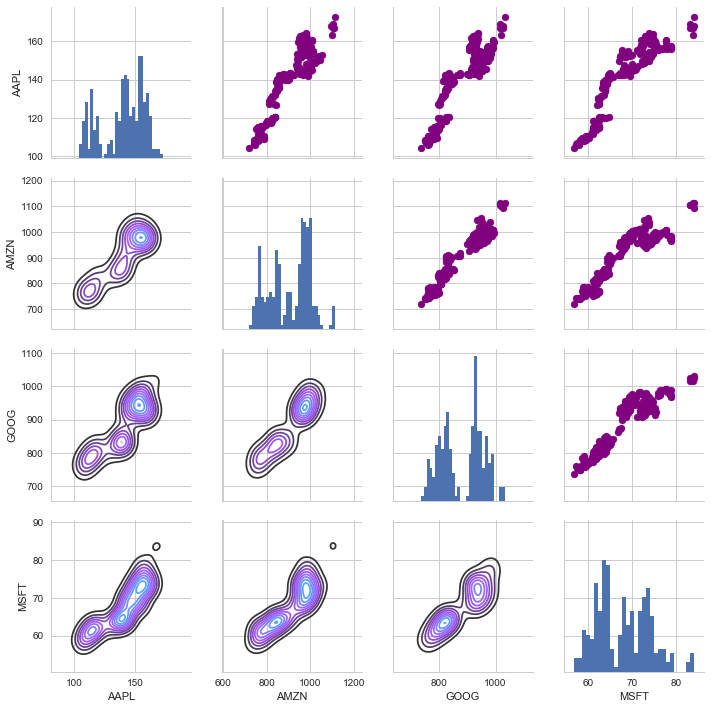

In [51]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

          AAPL      AMZN      GOOG      MSFT
AAPL  1.000000  0.544483  0.523809  0.489683
AMZN  0.544483  1.000000  0.683307  0.650690
GOOG  0.523809  0.683307  1.000000  0.673154
MSFT  0.489683  0.650690  0.673154  1.000000


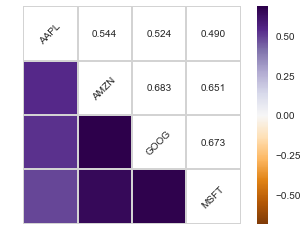

In [53]:
# sns.corrplot(tech_rets.dropna(),annot=True)
# Compute the correlation matrix
corr = tech_rets.dropna().corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)

for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, ha="center", va="center")
ax.axis("off")
plt.show()

          AAPL      AMZN      GOOG      MSFT
AAPL  1.000000  0.922330  0.895474  0.897932
AMZN  0.922330  1.000000  0.962757  0.913651
GOOG  0.895474  0.962757  1.000000  0.929427
MSFT  0.897932  0.913651  0.929427  1.000000


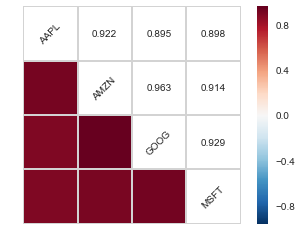

In [57]:
# sns.corrplot(closing_df,annot=True)
# Compute the correlation matrix
corr = closing_df.dropna().corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)

for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, ha="center", va="center")
ax.axis("off")
plt.show()

In [58]:
# analyze the risk of a stock

In [59]:
rets = tech_rets.dropna()

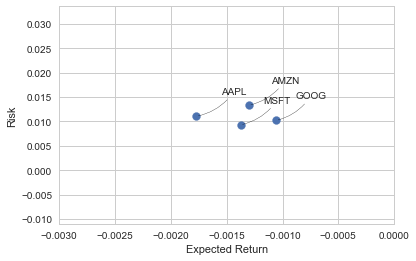

In [83]:
area = np.pi * 20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlim(-.003, 0)
# plt.ylim(-1, 1)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle='-', connectionstyle='arc3,rad=-0.2'))

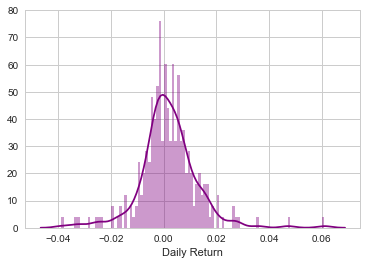

In [84]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [86]:
# get the risk value of the stock
rets['AAPL'].quantile(0.05)

-0.017384648111063754

In [87]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [89]:
def stock_monte_carlo(start_price, days, mu, sigma, dt):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [90]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-07,774.500000,785.190002,772.549988,782.520020,782.520020,1585100
2016-11-08,783.400024,795.632996,780.190002,790.510010,790.510010,1350800
2016-11-09,779.940002,791.226990,771.669983,785.309998,785.309998,2607100
2016-11-10,791.169983,791.169983,752.179993,762.559998,762.559998,4745200
2016-11-11,756.539978,760.780029,750.380005,754.020020,754.020020,2431800


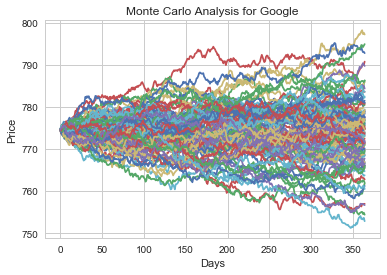

In [92]:
start_price = 774.50

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma,dt))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [93]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma,dt)[days-1]

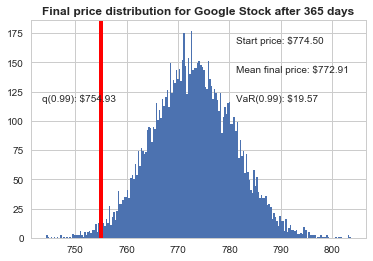

In [94]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')